<a href="https://colab.research.google.com/github/Boora-Raman/AIML-Lab/blob/main/StockPriceGoogle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


In [4]:
df = yf.download('GOOGL', start='2015-01-01', end='2024-12-31')
df = df[['Close']]  # Using only 'Close' price
df.dropna(inplace=True)


[*********************100%***********************]  1 of 1 completed


In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - 60:]  # add 60 for sequence

# Create sequences
def create_sequences(data, seq_len=60):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i - seq_len:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)

# Reshape input to [samples, time_steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [6]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - loss: 0.0195
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 3.7379e-04
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 3.4160e-04
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 3.3159e-04
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 3.0269e-04
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 3.5343e-04
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 3.2579e-04
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 2.7035e-04
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 2.4856e-04
Epoch 10/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 2.8089e-04


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


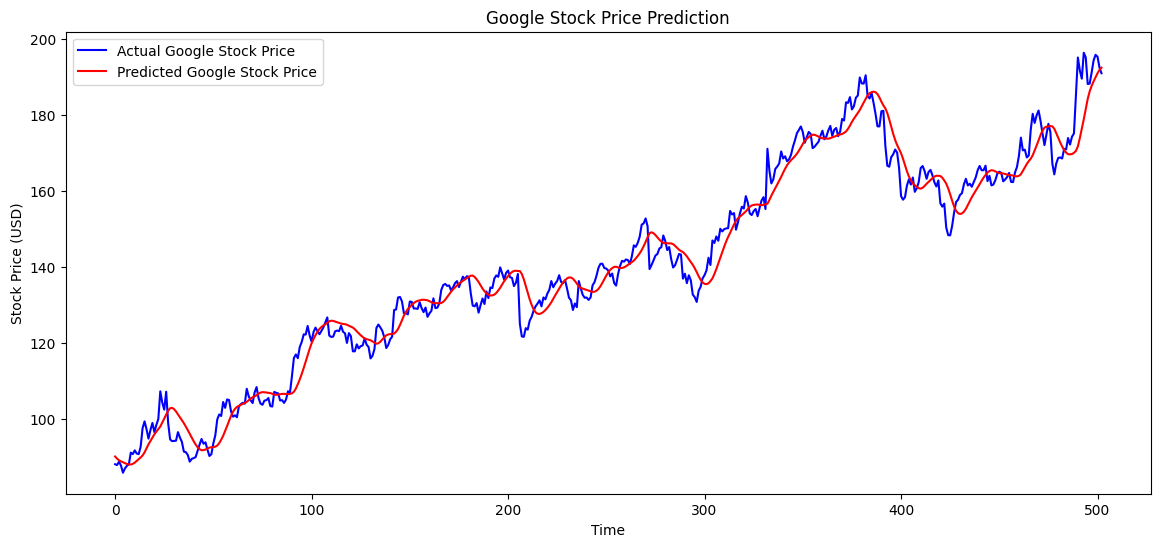

In [7]:
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(14, 6))
plt.plot(real_prices, color='blue', label='Actual Google Stock Price')
plt.plot(predicted_prices, color='red', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()
